<a href="https://colab.research.google.com/github/Tin-code/Tin-code/blob/main/projet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import drive

In [42]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [43]:
#importation des differents modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
#1-recuperation du dataset Coeur
data = pd.read_excel(r'/content/gdrive/My Drive/Coeur.xlsx')

In [45]:
#2-copie de data dans df 
df = data.copy()


In [46]:
#3- Verifier s'il y a des doublons et les supprimer
df.duplicated().sum()
df.drop_duplicates()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,homme,AT,110,264,0,Normal,132,Non,1.2,Plat,1
914,68,homme,ASY,144,193,1,Normal,141,Non,3.4,Plat,1
915,57,homme,ASY,130,131,0,Normal,115,Oui,1.2,Plat,1
916,57,femme,AA,130,236,0,LVH,174,Non,0.0,Plat,1


In [47]:
#4- Verifier s'il existe des variables constante(variable avec une seule modalité)
df.nunique()

AGE             50
SEXE             2
TDT              4
PAR             67
CHOLESTEROL    222
GAJ              2
ECG              3
FCMAX          119
ANGINE           2
DEPRESSION      53
PENTE            3
CŒUR             2
dtype: int64

In [48]:
#5-Verifier s'il y a des données manquante 
df.isna().sum()

AGE            0
SEXE           0
TDT            0
PAR            0
CHOLESTEROL    0
GAJ            0
ECG            0
FCMAX          0
ANGINE         0
DEPRESSION     0
PENTE          0
CŒUR           0
dtype: int64

In [49]:
#6- Normalisation des variables quantitatives 
var_quant = df.select_dtypes(exclude='object').drop('CŒUR', axis=1).columns
for col in var_quant:
  df[col] = pd.DataFrame(df[col]/df[col].mean())
var_normale = df[var_quant]

In [50]:
#7-Faire le recodage de toutes les variables qualitative
def recod(params):
  return params.astype('category').cat.codes

In [51]:
def recod_global(data):
  for col in data.select_dtypes('object').columns:
    data[col] = recod(data[col])
    return data


In [61]:
recod_global(df)

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,0.747511,1,0,1.057430,1.453726,0.00000,1,1.257224,0,0.000000,0,0
1,0.915701,0,3,1.208491,0.905435,0.00000,1,1.140273,0,1.126933,2,1
2,0.691448,1,0,0.981899,1.423544,0.00000,2,0.716325,0,0.000000,0,0
3,0.897014,0,1,1.042324,1.076461,0.00000,1,0.789420,1,1.690400,2,1
4,1.009140,1,3,1.132960,0.980887,0.00000,1,0.891752,0,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.840950,1,2,0.830838,1.327971,0.00000,1,0.964846,0,1.352320,2,1
914,1.270769,1,1,1.087642,0.970827,4.28972,1,1.030631,0,3.831574,2,1
915,1.065204,1,1,0.981899,0.658955,0.00000,1,0.840586,1,1.352320,2,1
916,1.065204,0,0,0.981899,1.187125,0.00000,0,1.271843,0,0.000000,2,1


In [62]:
#8-Separation des données 

Y = df[['CŒUR']]
X = df[['AGE','SEXE','TDT', 'PAR','CHOLESTEROL','GAJ','ECG','FCMAX','ANGINE','DEPRESSION ','PENTE']]
X

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE
0,0.747511,1,0,1.057430,1.453726,0.00000,1,1.257224,0,0.000000,0
1,0.915701,0,3,1.208491,0.905435,0.00000,1,1.140273,0,1.126933,2
2,0.691448,1,0,0.981899,1.423544,0.00000,2,0.716325,0,0.000000,0
3,0.897014,0,1,1.042324,1.076461,0.00000,1,0.789420,1,1.690400,2
4,1.009140,1,3,1.132960,0.980887,0.00000,1,0.891752,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
913,0.840950,1,2,0.830838,1.327971,0.00000,1,0.964846,0,1.352320,2
914,1.270769,1,1,1.087642,0.970827,4.28972,1,1.030631,0,3.831574,2
915,1.065204,1,1,0.981899,0.658955,0.00000,1,0.840586,1,1.352320,2
916,1.065204,0,0,0.981899,1.187125,0.00000,0,1.271843,0,0.000000,2


In [63]:
#9-Utilisation de la fonction train_test_split du module model_selection de sklearn

from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,random_state=1)
print('Train_set :',X_train.shape)
print('test_set :',X_test.shape)

Train_set : (734, 11)
test_set : (184, 11)


In [76]:
#10-Regression logistique 
from sklearn.linear_model import LogisticRegression

In [77]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [78]:
#11- Affichage de la probabilité d'appartenance à chacune des classes de la variable coeur

logReg.predict_proba(X_test[:5])

array([[0.32777726, 0.67222274],
       [0.17504272, 0.82495728],
       [0.03672641, 0.96327359],
       [0.08969688, 0.91030312],
       [0.23290901, 0.76709099]])

In [79]:
#12- Prediction de la classe d'appartenance de chaque individu de X_test
y_pred = logReg.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0])

#13- Matrice de confusion, taux de succès, sensibilité et précision du model

In [80]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
mat_conf = confusion_matrix(y_pred,y_test)
mat_conf

array([[ 66,   8],
       [  8, 102]])

In [81]:
#accuracy_score 
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_pred,y_test)
acc_score

0.9130434782608695

In [82]:
#recall score 
from sklearn.metrics import recall_score
rec_score = recall_score(y_pred,y_test)
rec_score

0.9272727272727272

In [83]:
#precision score
from sklearn.metrics import precision_score
prec_score = precision_score(y_pred,y_test)
prec_score

0.9272727272727272

In [84]:
#Enrégistrement du model pour pouvoir le déployer
import pickle
pickle.dump(logReg,open('model.pkl','wb'),protocol=2)

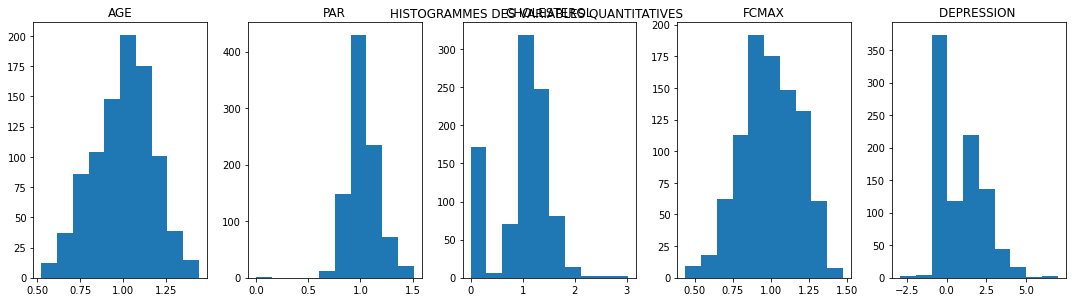

In [85]:
#Affichage de l'histogramme des variables quantitatives
quant = ['AGE','PAR','CHOLESTEROL', 'FCMAX', 'DEPRESSION ']
plt.figure(tight_layout = True, figsize = (15,8))
plt.suptitle("HISTOGRAMMES DES VARIABLES QUANTITATIVES")
for y,x in enumerate(quant):
    plt.subplot(2,5,y+1)
    plt.hist(df[x])
    plt.title(f"{quant[y]}")
plt.show()

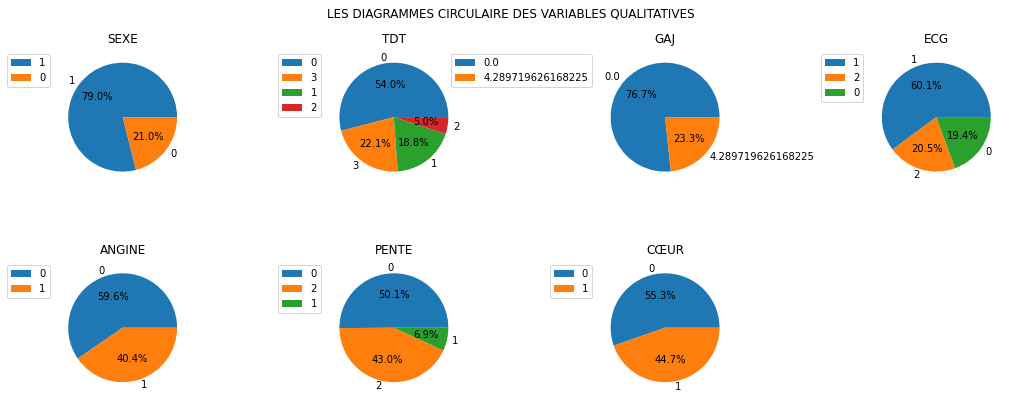

In [86]:
# Affichage du diagramme circulaire des variables qualitatives
qual = ['SEXE', 'TDT', 'GAJ', 'ECG', 'ANGINE', 'PENTE', 'CŒUR'] # la liste des variables qualitatives
plt.figure(tight_layout = True, figsize = (14,6))
plt.suptitle("LES DIAGRAMMES CIRCULAIRE DES VARIABLES QUALITATIVES")
for y,x in enumerate(qual):
    eff = df[x].value_counts()
    modalite = df[x].unique()
    plt.subplot(2,4,y+1)
    plt.pie(eff, labels = modalite, autopct = '%1.1f%%')
    plt.legend(bbox_to_anchor = (0, 1))
    plt.title(f"{qual[y]}")
plt.show()